# Simplified/Modified Alexnet architecture






---



In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

##  Alexnet
1. [227×227×3] INPUT
2. [55×55×96] CONV1: 96 11 ×11 filters at stride 4, pad 0
3. [27×27×96] MAX POOL1: 3 ×3 filters at stride 2
4. [27×27×96] NORM1: normalization layer
5. [27×27×256] CONV2: 256 5 ×5 filters at stride 1, pad 2
6. [13×13×256] MAX POOL2: 3 ×3 filters at stride 2
7. [13×13×256] NORM2: normalization layer
8. [13×13×384] CONV3: 384 3 ×3 filters at stride 1, pad 1
9. [13×13×384] CONV4: 384 3 ×3 filters at stride 1, pad 1
10. [13×13×256] CONV5: 256 3 ×3 filters at stride 1, pad 1
11. [6×6×256] MAX POOL3: 3 ×3 filters at stride 2
12. [4096] FC6: 4096 neurons, Dropout = 0.5
13.  [4096] FC7: 4096 neurons, Dropout = 0.5
14. [1000] FC8: 1000 neurons (class scores)

In [ ]:
alexnet=keras.models.Sequential([
    layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3),name="2"),
    layers.MaxPool2D(pool_size=(2,2),name="3"),
    layers.BatchNormalization(name="4"),
    layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same",name="5"),
    layers.MaxPool2D(pool_size=(3,3),name="6"),
    layers.BatchNormalization(name="7"),
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same",name="8"),
    layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same",name="9"),
    layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same",name="10"),
    layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
    layers.Flatten(),
    layers.Dense(4096,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1000,activation='softmax')
    ])
alexnet.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)
print('Param # 2', 128*(11*11*3+1))
print('Param # 4', 128*(4),"mean-calculated, std-calculated, scale-learned, shift-learned")
print('Param # 5', 256*(5*5*128+1))
print('Param # 7', 256*(4))
print('Total param - Trainable param',(39576680-39575912) )
print('Batch non-trainable', 512/2+1024/2)
alexnet.summary()

Param # 2 46592
Param # 4 512 mean-calculated, std-calculated, scale-learned, shift-learned
Param # 5 819456
Param # 7 1024
Tota param - Trainable param 768
Batch non-trainable 768.0
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 2 (Conv2D)                  (None, 55, 55, 128)       46592     
                                                                 
 3 (MaxPooling2D)            (None, 27, 27, 128)       0         
                                                                 
 4 (BatchNormalization)      (None, 27, 27, 128)       512       
                                                                 
 5 (Conv2D)                  (None, 27, 27, 256)       819456    
                                                                 
 6 (MaxPooling2D)            (None, 9, 9, 256)         0         
                                                                 
 7 

In [ ]:
alexnet.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy()]
)

#VGG16 Architecture
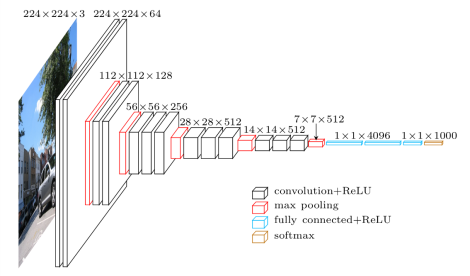

In [ ]:
from os import name
VGG16_architecture = keras.models.Sequential()
VGG16_architecture.add(keras.layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu",name='black1'))  #black
VGG16_architecture.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu",name='black2'))                          #black
VGG16_architecture.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),name='red1'))                                                    #red
VGG16_architecture.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu",name='black3'))                       #black
VGG16_architecture.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu",name='black4'))                       #black
VGG16_architecture.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),name='red2'))                                                    #red
VGG16_architecture.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu",name='black5'))                       #black
VGG16_architecture.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu",name='black6'))                       #black
VGG16_architecture.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu",name='black7'))                       #black
VGG16_architecture.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),name='red3'))                                                    #red
VGG16_architecture.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",name='black8'))                       #black
VGG16_architecture.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",name='black9'))                       #black
VGG16_architecture.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",name='black10'))                       #black
VGG16_architecture.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),name='red4'))                                                    #red
VGG16_architecture.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",name='black11'))                       #black
VGG16_architecture.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",name='black12'))                       #black
VGG16_architecture.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",name='black13'))                       #black
VGG16_architecture.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),name='red5'))                                                    #red
VGG16_architecture.add(keras.layers.Flatten())
VGG16_architecture.add(keras.layers.Dense(4096, activation='relu',name='blue14'))
VGG16_architecture.add(keras.layers.Dense(4096, activation='relu',name='blue15'))
VGG16_architecture.add(keras.layers.Dense(1000, activation='softmax',name='brown16'))
VGG16_architecture.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)
VGG16_architecture.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 black1 (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 black2 (Conv2D)             (None, 224, 224, 64)      36928     
                                                                 
 red1 (MaxPooling2D)         (None, 112, 112, 64)      0         
                                                                 
 black3 (Conv2D)             (None, 112, 112, 128)     73856     
                                                                 
 black4 (Conv2D)             (None, 112, 112, 128)     147584    
                                                                 
 red2 (MaxPooling2D)         (None, 56, 56, 128)       0         
                                                                 
 black5 (Conv2D)             (None, 56, 56, 256)      

In [ ]:
from tensorflow.keras.applications import VGG16
img_size = 224
VGG16_model = VGG16(include_top =True,
                         weights = 'imagenet',
                         input_shape=(img_size,img_size,3))
VGG16_model.summary()

553467096/553467096 [==============================] - 7s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
VGG16_model_topF = VGG16(include_top =False,
                         weights = 'imagenet',
                         input_shape=(img_size,img_size,3))
VGG16_model_topF.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
from os import name
VGG16_topF = keras.models.Sequential()
VGG16_topF.add(keras.layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu",name='black1'))  #black
VGG16_topF.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu",name='black2'))                          #black
VGG16_topF.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),name='red1'))                                                    #red
VGG16_topF.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu",name='black3'))                       #black
VGG16_topF.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu",name='black4'))                       #black
VGG16_topF.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),name='red2'))                                                    #red
VGG16_topF.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu",name='black5'))                       #black
VGG16_topF.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu",name='black6'))                       #black
VGG16_topF.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu",name='black7'))                       #black
VGG16_topF.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),name='red3'))                                                    #red
VGG16_topF.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",name='black8'))                       #black
VGG16_topF.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",name='black9'))                       #black
VGG16_topF.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",name='black10'))                       #black
VGG16_topF.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),name='red4'))                                                    #red
VGG16_topF.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",name='black11'))                       #black
VGG16_topF.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",name='black12'))                       #black
VGG16_topF.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",name='black13'))                       #black
VGG16_topF.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),name='red5'))                                                    #red
VGG16_topF.add(keras.layers.Flatten())

VGG16_topF.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 black1 (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 black2 (Conv2D)             (None, 224, 224, 64)      36928     
                                                                 
 red1 (MaxPooling2D)         (None, 112, 112, 64)      0         
                                                                 
 black3 (Conv2D)             (None, 112, 112, 128)     73856     
                                                                 
 black4 (Conv2D)             (None, 112, 112, 128)     147584    
                                                                 
 red2 (MaxPooling2D)         (None, 56, 56, 128)       0         
                                                                 
 black5 (Conv2D)             (None, 56, 56, 256)      

In [ ]:
from keras.applications.vgg16 import preprocess_input

img_path = '/content/drive/MyDrive/AIDL_data/AIDL_Bottle_Challenge_Dataset/test_128/00010.png'
img = keras.utils.load_img(img_path, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

pred = VGG16_model.predict(x)
#Print the probabilities of the top  classes
from tensorflow.keras.applications.mobilenet import decode_predictions
pred_classes = decode_predictions(pred, top=8)
for i in pred_classes[0]:
    print(i)

1/1 [==============================] - 1s 678ms/step
('n02823428', 'beer_bottle', 0.47125778)
('n03983396', 'pop_bottle', 0.20279856)
('n04557648', 'water_bottle', 0.04844437)
('n02930766', 'cab', 0.032968696)
('n02747177', 'ashcan', 0.031055294)
('n03891332', 'parking_meter', 0.022522463)
('n04591713', 'wine_bottle', 0.02159156)
('n04154565', 'screwdriver', 0.020129608)


## Transer Learning

https://www.kaggle.com/code/ishaparanjpe/transfer-learning-w-animals-vgg16/notebook